In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier

In [2]:
dataset = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
dataset.shape

(319795, 18)

In [4]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
dataset = dataset[["HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Sex", "AgeCategory", "PhysicalActivity", "SleepTime"]]
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,SleepTime
0,No,16.60,Yes,No,Female,55-59,Yes,5.0
1,No,20.34,No,No,Female,80 or older,Yes,7.0
2,No,26.58,Yes,No,Male,65-69,Yes,8.0
3,No,24.21,No,No,Female,75-79,No,6.0
4,No,23.71,No,No,Female,40-44,Yes,8.0


In [6]:
dataset = dataset.iloc[:dataset.shape[0]//3, :]
dataset.shape

(106598, 8)

In [7]:
nan_features = [f for f in dataset.columns if dataset[f].dtype == object]

for feature in nan_features:
    print(dataset.groupby(feature).mean())

                    BMI  SleepTime
HeartDisease                      
No            28.169482   7.092790
Yes           29.282156   7.157883
               BMI  SleepTime
Smoking                      
No       28.155154   7.130374
Yes      28.420190   7.054124
                       BMI  SleepTime
AlcoholDrinking                      
No               28.334483   7.101023
Yes              27.347704   7.063795
              BMI  SleepTime
Sex                         
Female  28.119466   7.117996
Male    28.428171   7.076846
                   BMI  SleepTime
AgeCategory                      
18-24        25.823955   7.161420
25-29        27.677924   6.967487
30-34        28.392775   6.879138
35-39        28.799033   6.856794
40-44        29.100137   6.891398
45-49        29.459405   6.899486
50-54        29.430383   6.926525
55-59        29.065332   6.973929
60-64        28.796193   7.056255
65-69        28.647904   7.198703
70-74        28.034318   7.308119
75-79        27.551814   7.406

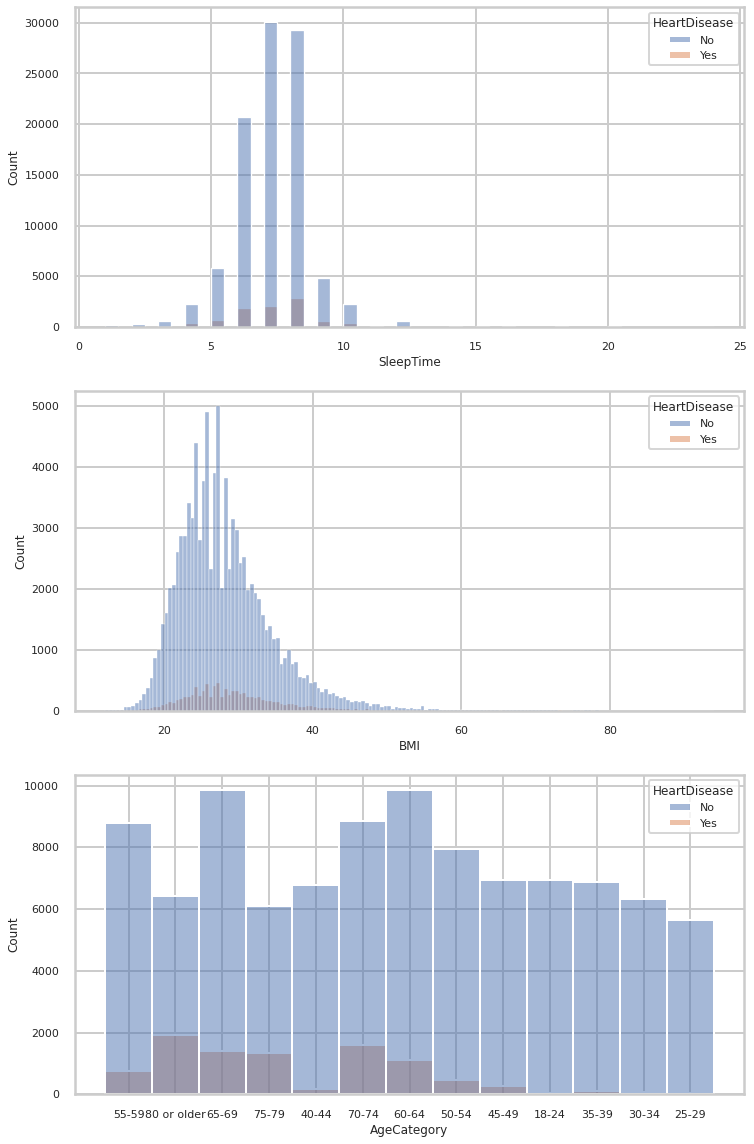

In [8]:
sns.set_theme(context="poster", style="whitegrid", font_scale=0.5)
fig, ax = plt.subplots(3, 1)
fig.set_figheight(20)
fig.set_figwidth(12)

continuous_features = ["AgeCategory", "BMI", "SleepTime"]

for i in range(3):
    if continuous_features:
        sns.histplot(ax=ax[i], x=continuous_features.pop(), data=dataset,hue="HeartDisease", binwidth=.5, color="w")

In [9]:
data = dataset.copy()

for feature in ["HeartDisease", "Smoking", "AlcoholDrinking", "PhysicalActivity"]:
    data[feature] = data[feature].replace({"Yes": 1, "No": 0})

data["Sex"] = data["Sex"].replace({"Female": 1, "Male": 0})
data["AgeCategory"] = data["AgeCategory"].astype("category").cat.codes

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,SleepTime
0,0,16.60,1,0,1,7,1,5.0
1,0,20.34,0,0,1,12,1,7.0
2,0,26.58,1,0,0,9,1,8.0
3,0,24.21,0,0,1,11,0,6.0
4,0,23.71,0,0,1,4,1,8.0


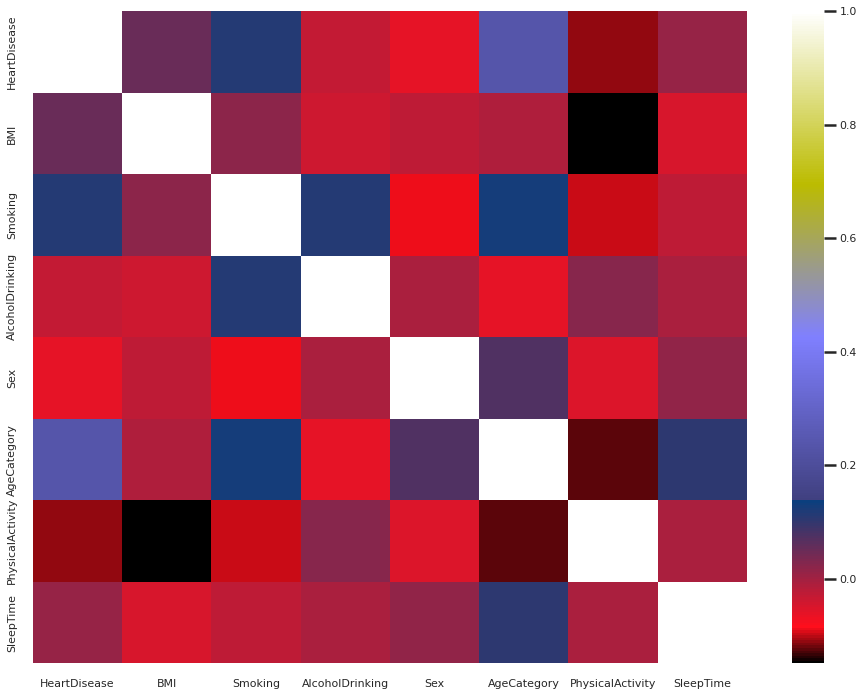

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), cmap="gist_stern")
plt.show()

In [11]:
training_target = data["HeartDisease"]
training_features = data.drop("HeartDisease", axis=1)

In [12]:
class_model = SGDClassifier()

In [13]:
class_model.fit(training_features, training_target)
class_model.score(training_features, training_target)

0.9131315784536296